# A graph matching method based on Integer Linear Programming

This notebook is a follow up of the notebook called "[a graph matching method based on the leading Eigen vector and Sinkhorn-Knopp algorithm](
http://romain.raveaux.free.fr/document/A+graph+matching+method+based+on+the+leading+Eigen+vector+and+Sinkhorn-Knopp+algorithm.html)"

This notebook shows how to perform graph matching thanks to Integer Linear Programming.

It is based on several papers
- 	Puqing Chen, Romain Raveaux et al :
[Deep graph matching meets mixed-integer linear programming](https://arxiv.org/abs/2108.00394): Relax at your own risk ? CoRR abs/2108.00394 (2021)
- Romain Raveaux: [On the unification of the graph edit distance and graph matching problems.](https://hal.archives-ouvertes.fr/hal-03163084) Pattern Recognit. Lett. 145: 240-246 (2021)

## Authors : Romain Raveaux (romain.raveaux@univ-tours.fr), Puqing Chen (c.puqing@gmail.com)
# Web site : http://romain.raveaux.free.fr



In [2]:
!ls "./"
homedir="."

'A graph matching method based on Eigen Vectors.ipynb'
 data
'GNN Graph Classification LETTER simple.ipynb'
 module



## The graph matching problem
The following text is better displayed and more accurate in the PDF file : http://romain.raveaux.free.fr/document/AroundGraphMatchingRelaxedAndRefined.pdf

The objective of graph matching is to find correspondences between two attributed graphs $G_1$ and $G_2$. A solution of graph matching is defined as a subset of possible
correspondences $\mathcal{Y} \subseteq V_1 \times V_2$, represented by a binary assignment matrix $Y \in \{0,1 \}^{n1 \times n2}$, where $n1$ and $n2$ denote the number of nodes in $G_1$ and $G_2$, respectively. If $u_i \in V_1$ matches $v_k \in V_2$, then $Y_{i,k}=1$, and $Y_{i,k}=0$ otherwise. We
denote by $y\in \{0,1 \}^{n1 . n2}$, a column-wise vectorized replica of $Y$. With this notation, graph matching problems can be expressed as finding the assignment vector $y^*$ that maximizes a score function $S(G_1, G_2, y)$ as follows:
 
 \begin{align}
    y^* =& \underset{y} {\mathrm{argmax}} \quad S(G_1, G_2, y)\\
    \text{subject to}\quad & y \in \{0, 1\}^{n1.n2} \\
    &\sum_{i=1}^{n1} y_{i,k} \leq 1 \quad \forall k \in [1, \cdots, n2]\\
     &\sum_{k=1}^{n2} y_{i,k} \leq 1 \quad \forall i \in [1, \cdots, n1]
 \end{align}

where equations \eqref{eq:subgmgmc},\eqref{eq:subgmgmd} induces the matching constraints, thus making $y$ an assignment vector.

The function $S(G_1, G_2, y)$ measures the similarity of graph attributes, and is typically decomposed into a first order dissimilarity function $s(u_i,v_k)$ for a node pair $u_{i} \in V_1$ and $v_k \in V_2$, and a second-order similarity function $s(e_{ij},e_{kl})$ for an edge pair $e_{ij} \in E_1$ and $e_{kl} \in E_2$. Thus, the objective function of graph matching is defined as: 
  \begin{equation}
  \begin{aligned}
  S(G_1,G_2,y) =&	\sum_{i=1}^{n1} \sum_{k=1}^{n2} s(u_i,v_k)  \cdot y_{i,k} + \sum_{i=1}^{n1} \sum_{j=1}^{n1} \sum_{k=1}^{n2} \sum_{l=1}^{n2} s(e_{ij},e_{kl})\cdot y_{ik} \cdot y_{jl}\\
  =&	 \sum_{i=1}^{n1} \sum_{j=1}^{n1} \sum_{k=1}^{n2} \sum_{l=1}^{n2} K_{ik,jl}\cdot y_{ik} \cdot y_{jl}\\
  \quad \quad \quad \quad  =&y^TKy  
    \end{aligned}
\end{equation}
 
Similarity functions are usually represented by a symmetric similarity matrix $K \in \mathbb{R}^{n1n2 \times n1n2}$. A non-diagonal element $K_{ik,jl} = s(e_{ij},e_{kl})$ contains the edge similarity and a diagonal term $K_{ik,ik} = s(u_i,v_k)$  represents the vertex similarity. $K$ is called an affinity matrix or compatibility matrix. In this representation, $K_{ij,kl}=0$ means an impossible matching or a very dissimilar matching.
In essence, the score accumulates all the similarity values that are relevant to the assignment. 
The formulation in Problem \ref{model:iqpsubgm} is referred to as an integer
quadratic programming. This integer
quadratic programming expresses the quadratic
assignment problem, which is known to be NP-hard.

## Relaxed graph matching problem
The NP-hard graph matching problem is relaxed by dropping both the binary and the mapping constraints.
The model to be solved is then:

  \begin{equation}
  \begin{aligned}
    y^* =& \underset{y} {\mathrm{argmax}} \quad y^TKy     
    \end{aligned}
  \end{equation}
  \begin{align}
    \text{subject to}\quad & y \in [0,1]^ {\vert V_1 \vert \cdot \vert V_2 \vert }\\
    %\label{eq:subgmgmc}
    &\Vert y \Vert_2 =1
%    & \sqrt{\sum_{i=1}^{\vert V_1 \vert} \sum_{k=1}^{\vert V_2 \vert} (y_{i,k})^2} = 1 
  \end{align}


## Solving the relaxed graph matching problem

The optimal $y^*$ is then given by the leading eigenvector of the matrix $K$. 

### Eigen vectors
First, we need to find the eigen values $\lambda$ such that : 
\begin{equation}
P=\vert K - \lambda I \vert
\end{equation}
Setting the polynomial (P) equal to zero: $P=0$. The polynomial has roots at $\lambda_i \quad \forall i \in [1, \cdots, n1.n2]$. $\lambda_i$ are the two eigenvalues of K.
The eigenvectors corresponding to each eigenvalue can be found by solving for the components of v in the equation:
\begin{equation}
(K - \lambda I)m_i=0 \quad \forall i \in [1, \cdots, n1.n2]
\end{equation}
The eigenvector associated to the highest eigenvalue is the solution of the Problem \ref{model:relaxedQAPK}.
\begin{equation}
k^*= arg \max_{k \in [1, \cdots, n1.n2 ] } \lambda_k
\end{equation}

\begin{equation}
y^* = m_{k^*} 
\end{equation}

### Power iteration
Computing the leading eigenvector $y^*$ of the affinity matrix $K$ can be done using power iterations.
\begin{equation}
m^{(k+1)}=\frac{K m^{(k)}}{\Vert K m^{(k)} \Vert_2}
\end{equation}
$m_0 =1$ is initialize to 1. $N$ iterations are run to output the vector $y^* =m^{(N)}$.

The time complexity of this algorithm per power iteration is $O(n1^2.n2^2)$ when the matrix K is dense.

## Refined the relaxed graph matching problem
The solution $y^*$ of the relaxed graph matching problem (Problem \ref{model:relaxedQAPK}) is reshaped to become a matrix $Y^* \in \mathbb{R}^{n1 \times n2}$. Then, the matrix $Y^*$ is modified to become a doubly stochastic matrix. In the graph matching context, this modification represents the adding of the one-to-one mapping constraints (L1 constraints) $\forall k, \sum_{i} y_{ik} = 1$ and $\forall i, \sum_{k} y_{ik} = 1$. The transformation of the matrix $Y^*$ to a doubly stochastic matrix is performed by the Sinkhorn-Knopp algorithm: Starting with $M^{(0)}=Y^*$.
$$M^{(k+1)}=M_k[1_{n1}^TM^{(k)}]^{-1}$$
$$M^{(k+2)}=[M^{(k+1)}1_{n2}]^{-1}M^{(k+1)}$$
$$M^{(k+1)}_{i,j}=\frac{M^{(k)}_{i,j}}{\sum_j M^{(k)}_{i,j}} \quad \forall i \in [1, \cdots, n1]$$
$$M^{(k+2)}_{i,j}=\frac{M^{(k+1)}_{i,j}}{\sum_i M^{(k+1)}_{i,j}} \quad \forall j \in [1, \cdots, n2]$$
With : $1_{n1} \in {1}^{n1 \times 1}$ and $1_{n2} \in {1}^{n2 \times 1}$.



# Integer Linear Programming for Graph Matching
An Integer Linear Program (ILP) is a mathematical model where the objective function is a linear combination of the variables. The objective function is constrained by linear combinations of the variables. The Interger Linear Programming aims at solving the "exact" graph mathcing problem by exact we mean the not relaxed problem.

The entire formulation is called F2 [see the reference for the full details](https://hal.archives-ouvertes.fr/hal-03163084) and described as follows : 


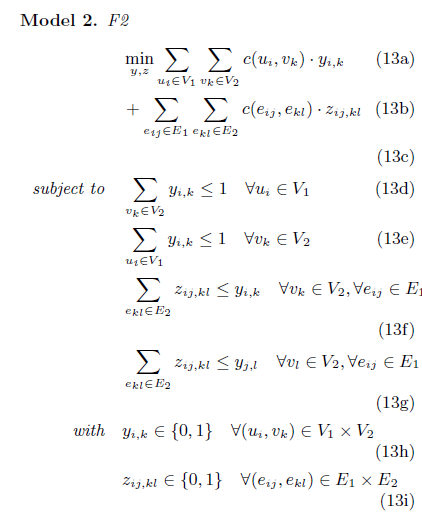

Where the function $c$ is a cost function defined a the opposite of the similarity function (c=-s).

# Let's code !

1. Read two graphs
2. Define the similarity function
3. Compute the cost function $c$
4. Implementing the Interger Linear Program
5. Compute the matching by solving the Interger Linear Program


# Install requirements
*   [Networkx](https://networkx.github.io/)
Networkx to handle graphs.
Run the folowing command to install it : 
!pip install networkx


# Read the graphs
1. Datasets and functions to read data are taken from http://gmprdia.univ-lr.fr/

## Download Data

### Letter Database

Graphs that represent distorted letter drawings. They consider the 15 capital letters of the Roman alphabet that consist of straight lines only (A, E, F, H, I, K, L, M, N, T, V, W, X, Y, Z). Each node is labeled with a two-dimensional attribute giving its position relative to a reference coordinate system. Edges are unlabeled. The graph database consists of a training set, a validation set, and a test set of size 750 each. Also, three levels of distortions are provided.

This dataset is part of [IAM Graph Database Repository](http://www.fki.inf.unibe.ch/databases/iam-graph-database) and it is also linked in the [IAPR TC15 resources](https://iapr-tc15.greyc.fr/links.html).

It can be considered as a **TOY EXAMPLE** for graph classification.

> Riesen, K. and Bunke, H.: [IAM Graph Database Repository for Graph Based Pattern Recognition and Machine Learning.](https://link.springer.com/chapter/10.1007/978-3-540-89689-0_33) In: da Vitora Lobo, N. et al. (Eds.), SSPR&SPR 2008, LNCS, vol. 5342, pp. 287-297, 2008.


In [3]:
#!wget https://iapr-tc15.greyc.fr/IAM/Letter.zip
#!unzip Letter.zip

## Prepare data reader

IAM graphs are provided as a GXL file:


```
<gxl>
  <graph id="GRAPH_ID" edgeids="false" edgemode="undirected">
    <node id="_0">
      <attr name="x">
        <float>0.812867</float>
      </attr>
      <attr name="y">
        <float>0.630453</float>
      </attr>
    </node>
    ...
    <node id="_N">
      ...
    </node>
    <edge from="_0" to="_1"/>
    ...
    <edge from="_M" to="_N"/>
  </graph>
</gxl>
```

# Some imports

In [4]:
import numpy as np
import xml.etree.ElementTree as ET
import networkx as nx
import os
import matplotlib.pyplot as plt
import sys
import torch

!pip install gurobipy  # install gurobipy, if not already installed
import gurobipy as gp  # import the installed package

sys.path.append(homedir) # go to parent dir

%matplotlib inline  

### Read a graph

In [5]:

def read_letters(file):
  """Parse GXL file and returns a networkx graph
  """
  
  tree_gxl = ET.parse(file)
  root_gxl = tree_gxl.getroot()
  node_label = {}
  node_id = []
  
  # Parse nodes
  for i, node in enumerate(root_gxl.iter('node')):
    node_id += [node.get('id')]
    for attr in node.iter('attr'):
      if (attr.get('name') == 'x'):
        x = float(attr.find('float').text)
      elif (attr.get('name') == 'y'):
        y = float(attr.find('float').text)
    node_label[i] = [x, y]

  node_id = np.array(node_id)

  # Create adjacency matrix
  am = np.zeros((len(node_id), len(node_id)))
  for edge in root_gxl.iter('edge'):
    s = np.where(node_id==edge.get('from'))[0][0]
    t = np.where(node_id==edge.get('to'))[0][0]

    # Undirected Graph
    am[s,t] = 1
    am[t,s] = 1

  # Create the networkx graph
  G = nx.from_numpy_matrix(am)
  nx.set_node_attributes(G, node_label, 'position')
  
  return G


## Load Data with NetworkX
### We load 2 graphs  and we display them


[0, 1, 2]


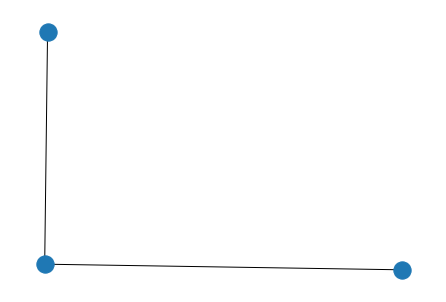

[0, 1, 2]


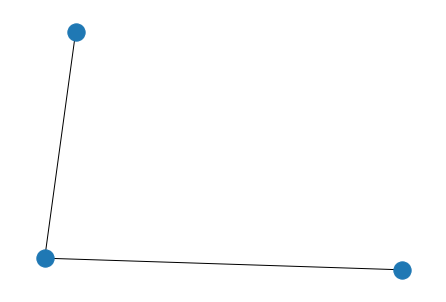

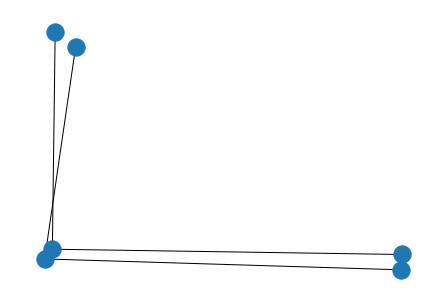

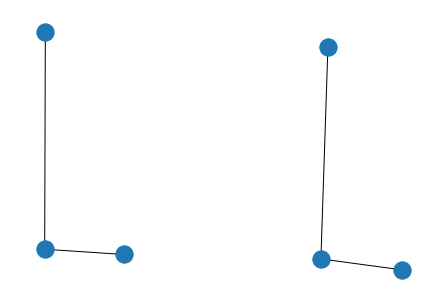

In [6]:

# Select distortion [LOW, MED, HIGH]
distortion = 'LOW'

# Select letter [A, E, F, H, I, K, L, M, N, T, V, W, X, Y, Z]
letter = 'L'

# Select id [0-149]
id=50

# Read the graph and draw it using networkx tools
G1 = read_letters(os.path.join(homedir,'data','Letter', distortion, letter+'P1_'+ str(id).zfill(4) +'.gxl'))
print(G1.nodes)
nx.draw(G1, pos=dict(G1.nodes(data='position')))
plt.show()


id=52#100#52#100

# Read the graph and draw it using networkx tools
G2 = read_letters(os.path.join(homedir,'data','Letter', distortion, letter+'P1_'+ str(id).zfill(4) +'.gxl'))
print(G2.nodes)
nx.draw(G2, pos=dict(G2.nodes(data='position')))
plt.show()

n1=G1.number_of_nodes()
G1G2=nx.disjoint_union(G1,G2)
nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')))
plt.show()

for i in range(n1,G1G2.number_of_nodes()):
    G1G2.nodes[i]['position']=[G1G2.nodes[i]['position'][0]+5,G1G2.nodes[i]['position'][1]]

nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')))
plt.show()

# Similarity functions 
Simiarity functions are of first interest. Since they drive the optimization problem. We will present two differents kind of similarities just for pedagogical purpose.

First, we extract node features and ajacency matrix.  
## Nodes features and adjacency matrix
Node features are the position (x,y) in a 2D space.

In [7]:
def ExtractNodeFeaturesAndAdjacencyMatrix(G):
    
    nodelist, nodes = map(list, zip(*G.nodes(data='position')))
    GnodesFeatures = np.array(nodes)
    Gadjacency = np.array(nx.adjacency_matrix(G, nodelist=nodelist).todense())
    #print(GnodesFeatures.shape)
    #print(GnodesFeatures)
    #print(Gadjacency)
    
    return GnodesFeatures,Gadjacency


print("Printing the first node")
print(G1.nodes[0])
print("Printing the edges : they have no attributes")
print(G1.edges)
print("Printing the nodes attributes")
print(G1.nodes(data='position'))
G1nodesFeatures,G1adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G1)
G2nodesFeatures,G2adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G2)


Printing the first node
{'position': [0.829524, 3.00922]}
Printing the edges : they have no attributes
[(0, 1), (1, 2)]
Printing the nodes attributes
[(0, [0.829524, 3.00922]), (1, [0.818021, 0.789384]), (2, [2.24539, 0.735653])]


### Node Similarity : Version 1
Let us see if we use the scalar product as a similarity measure. Features are node position (x,y) in a 2D space

(3, 2)
(3, 2)
(3, 3)
[[1.         0.29240239 0.38583449]
 [0.3210411  0.12730491 0.24532506]
 [0.44422691 0.24362633 0.58458739]]
[0 0 2]


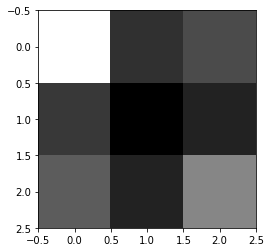

In [8]:
print(G1nodesFeatures.shape)
print(G2nodesFeatures.shape)
NodeSimilarity=G1nodesFeatures.dot(G2nodesFeatures.T)
NodeSimilarity=NodeSimilarity/NodeSimilarity.max()
print(NodeSimilarity.shape)
print(NodeSimilarity)
print(NodeSimilarity.argmax(axis=1))
plt.imshow(NodeSimilarity,cmap="gray")

Converting similarities to costs 

The first order similarities are stored to vector and converted to costs

In [9]:
UnaryCosts=-NodeSimilarity
print(UnaryCosts.shape)

(3, 3)


Let's build edge similarities. Here we do not compute similarities but dissimilarities. Edge dissimilarities are the normalized distances between two nodes. 

[(0, 1), (1, 2)]
[(0, 1), (1, 2)]
{'weight': 1.0}
[2.2198658035802525, 1.4283799503360444]
(2, 1)
[2.1638156019977766, 1.4579918244736492]
(2, 1)
[[1.         0.67380595]
 [0.64345329 0.43356265]]


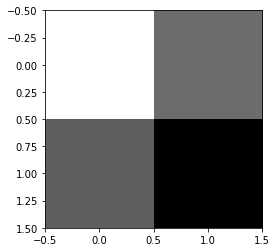

In [10]:
e1=G1.edges()
print(e1)
e2=G2.edges()
print(e2)
print(e1[(0,1)])
e1features=[]
for ij in e1:
  featurei=G1nodesFeatures[ij[0]]
  featurej=G1nodesFeatures[ij[1]]
  distance=np.linalg.norm(featurei-featurej,2)
  #e1[ij]['weight']
  e1features.append(distance)
print(e1features)
e1features=np.array(e1features)
e1features=e1features.reshape((e1features.shape[0],1))
print(e1features.shape)

e2features=[]
for ij in e2:
  featurei=G2nodesFeatures[ij[0]]
  featurej=G2nodesFeatures[ij[1]]
  distance=  distance=np.linalg.norm(featurei-featurej,2)
  e2features.append(distance)
  #e2features.append(e2[ij]['weight'])
print(e2features)
e2features=np.array(e2features)
e2features=e2features.reshape((e2features.shape[0],1))
print(e2features.shape)


EdgeSimilarities = e1features.dot(e2features.T)
EdgeSimilarities=EdgeSimilarities/EdgeSimilarities.max()

print(EdgeSimilarities)
plt.imshow(EdgeSimilarities,cmap="gray")

EdgeSimilarities represent a distance so it is not a similarity but a cost.

In [11]:
QuadraticCosts=EdgeSimilarities
print(QuadraticCosts.shape)

(2, 2)


#Let us make a function to compute costs : Version 1 (with features)

In [12]:
def ComputeUnaryQuadraticCostsV1(G1,G2,G1nodesFeatures,G2nodesFeatures):
  e1=G1.edges()
  e2=G2.edges()
  e1features=[]
  for ij in e1:
    featurei=G1nodesFeatures[ij[0]]
    featurej=G1nodesFeatures[ij[1]]
    distance=np.linalg.norm(featurei-featurej,2)
    e1features.append(distance)
  e1features=np.array(e1features)
  e1features=e1features.reshape((e1features.shape[0],1))
  
  e2features=[]
  for ij in e2:
    featurei=G2nodesFeatures[ij[0]]
    featurej=G2nodesFeatures[ij[1]]
    distance=np.linalg.norm(featurei-featurej,2)
    e2features.append(distance)
  e2features=np.array(e2features)
  e2features=e2features.reshape((e2features.shape[0],1))
  

  EdgeSimilarities = e1features.dot(e2features.T)
  EdgeSimilarities=EdgeSimilarities/EdgeSimilarities.max()
  QuadraticCosts=EdgeSimilarities

  NodeSimilarity=np.ones(G1nodesFeatures.shape).dot(np.ones(G2nodesFeatures.shape).T)
  NodeSimilarity=NodeSimilarity/NodeSimilarity.max()
  UnaryCosts=-NodeSimilarity
  return UnaryCosts,QuadraticCosts

#Now let us compute similarities without attributes/features.
Similairies between nodes equal 1 always. 
Similairies between edges equal 1 always.
## Only the structure of the graph matters. The problem falls into subgraph isomorhism.

In [13]:
def ComputeUnaryQuadraticCostsV2(G1,G2,G1nodesFeatures,G2nodesFeatures):
  e1=G1.edges()
  e2=G2.edges()
  e1features=[]
  for ij in e1:
    e1features.append(e1[ij]['weight'])
    
  e1features=np.array(e1features)
  e1features=e1features.reshape((e1features.shape[0],1))
  
  e2features=[]
  for ij in e2:
    e2features.append(e2[ij]['weight'])
  e2features=np.array(e2features)
  e2features=e2features.reshape((e2features.shape[0],1))
  

  EdgeSimilarities = e1features.dot(e2features.T)
  QuadraticCosts=-EdgeSimilarities

  NodeSimilarity=np.ones(G1nodesFeatures.shape).dot(np.ones(G2nodesFeatures.shape).T)
  UnaryCosts=-NodeSimilarity
  return UnaryCosts,QuadraticCosts

## The two kind of similarities (version 1 and Version 2) built with and without features information represent two different problems. The objective function based on similarities version 2 may not drive very well the solver and many symmetries may appear in the problem because eveyrthing is similar. So the solving task may be more challenging for this version.

# To be able to create the Interger Linear Model, we need to crate a list of edges.
Creating edges_src and edges_dst.

edges_src: a torch.tensor os shape (|E_1|, 2) describing edges of G_1,


edges_dst: a torch.tensor os shape (|E_2|, 2) describing edges of G_2.

In [14]:
e1= G1.edges()
edges_g1 =np.zeros((len(e1),2))
count=0
for ij in G1.edges():
  edges_g1[count][0]=ij[0]
  edges_g1[count][1]=ij[1]
  count=count+1
print(edges_g1)


[[0. 1.]
 [1. 2.]]


In [15]:
e2= G2.edges()
edges_g2 =np.zeros((len(e2),2))
count=0
for ij in G2.edges():
  edges_g2[count][0]=ij[0]
  edges_g2[count][1]=ij[1]
  count=count+1
print(edges_g2)


[[0. 1.]
 [1. 2.]]


## Graph Matching by Integer Linear Programming


# Let us implement the model:

In [16]:
from gurobipy import Model
from gurobipy import GRB
from gurobipy import quicksum

In [17]:
def gm_solver(costs, quadratic_costs, edges_src, edges_dst, solver_params):
    V1, V2 = costs.shape[0], costs.shape[1]
    E1, E2 = edges_src.shape[0], edges_dst.shape[0]

    coeff_x = dict()
    for i in range(V1):
        for j in range(V2):
            coeff_x[(i,j)] = costs[i][j]
    coeff_y = dict()
    if E1 != 0 and E2 != 0:
        for i in range(E1):
            for j in range(E2):
                coeff_y[(i,j)] = quadratic_costs[i][j]

    model = Model("gm_solver")
    for param, value in solver_params.items():
        model.setParam(param, value)

#Boolean variables
    x = model.addVars(V1, V2, lb=0, ub=1, vtype=GRB.BINARY, name="x")
    y = model.addVars(E1, E2, lb=0, ub=1, vtype=GRB.BINARY, name="y")
#The objective function
    obj = x.prod(coeff_x) + y.prod(coeff_y)
#We want to minimize
    model.setObjective(obj, GRB.MINIMIZE)
#Assigment constraints
    x_row_constrs = [model.addConstr(quicksum(x.select(i,'*')) <= 1) for i in range(V1)]
    x_col_constrs = [model.addConstr(quicksum(x.select('*', j)) <= 1) for j in range(V2)]
#Topological constraints for x_ik
    for ij in range(E1):
        i = int(edges_src[ij][0])
        for k in range(V2):
            ls = []
            for kl in range(E2):
              #Select the node k
              if edges_dst[kl][0] == k:
                ls.append(y.select(ij, kl)[0])
            valik=x.select(i, k)[0]
            sumofy=quicksum(ls)
            model.addConstr(sumofy <= valik)
#Topological constraints for x_jl    
    for ij in range(E1):
        j = int(edges_src[ij][1])
        for l in range(V2):
            ls = []
            for kl in range(E2):
              #Select the node l
              if edges_dst[kl][1] == l:
                ls.append(y.select(ij, kl)[0])
            model.addConstr(quicksum(ls) <= x.select(j, l)[0])

    model.optimize()

    assert model.status == GRB.OPTIMAL

    pmat_v = np.zeros(shape=(V1,V2), dtype=np.compat.long)
    for indx, var in zip(x, x.select()):
        pmat_v[indx] = var.X
    
    pmat_e = np.zeros(shape=(E1,E2), dtype=np.compat.long)
    for indx, var in zip(y, y.select()):
        pmat_e[indx] = var.X

    return pmat_v, pmat_e


#Calling the solver
UnaryCosts, QuadraticCosts= ComputeUnaryQuadraticCostsV1(G1,G2,G1nodesFeatures,G2nodesFeatures)
edges_left_batch=[torch.from_numpy(edges_g1).T]
edges_right_batch=[torch.from_numpy(edges_g2).T]
torchUnaryCosts=torch.zeros((1,UnaryCosts.shape[0],UnaryCosts.shape[1]))
torchUnaryCosts[0,:,:]=torch.from_numpy(UnaryCosts)
torchQuadraticCosts=torch.zeros((1,QuadraticCosts.shape[0],QuadraticCosts.shape[1]))
torchQuadraticCosts[0,:,:]=torch.from_numpy(QuadraticCosts)
solver_params={'OutputFlag':1}

NodeMatching,EdgeMatching=gm_solver(torchUnaryCosts[0], torchQuadraticCosts[0], edges_left_batch[0], edges_right_batch[0], solver_params)
print(NodeMatching)
print(EdgeMatching)

Restricted license - for non-production use only - expires 2023-10-25
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 18 rows, 13 columns and 38 nonzeros
Model fingerprint: 0x5eb266b7
Variable types: 0 continuous, 13 integer (13 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-01, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -3.0000000
Presolve removed 12 rows and 4 columns
Presolve time: 0.00s
Presolved: 6 rows, 9 columns, 18 nonzeros
Variable types: 0 continuous, 9 integer (9 binary)

Root relaxation: cutoff, 0 iterations, 0.00 seconds (0.00 work units)

Explored 1 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 2 (of 2 available processors)

Solution count 1: -3 
No other solutions better than -3

Optimal solution found (tolerance 1.00e-04)
B

### Visualization of the matching

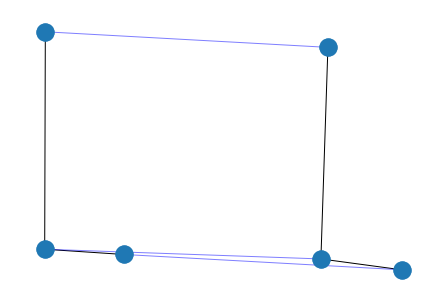

In [18]:
G1G2=nx.disjoint_union(G1,G2)
for i in range(n1,G1G2.number_of_nodes()):
    G1G2.nodes[i]['position']=[G1G2.nodes[i]['position'][0]+5,G1G2.nodes[i]['position'][1]]
edgelista=[]
bestmatch=NodeMatching.argmax(axis=0)
for i in range(n1):
    k=int(bestmatch[i])
    #G1G2.add_edge(i, k+n1, edge_color='r')
    edgelista.append((i, k+n1))

nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')))
nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')),edgelist=edgelista,
                       width=1, alpha=0.5, edge_color='b')
plt.show()


# Let's make a function that builds the edge lists and the costs

In [19]:
def BuildGraphMatchingModule(G1,G2,UnaryCosts,QuadraticCosts):
  e1= G1.edges()
  edges_g1 =np.zeros((len(e1),2))
  count=0
  for ij in G1.edges():
    edges_g1[count][0]=ij[0]
    edges_g1[count][1]=ij[1]
    count=count+1

  e2= G2.edges()
  edges_g2 =np.zeros((len(e2),2))
  count=0
  for ij in G2.edges():
    edges_g2[count][0]=ij[0]
    edges_g2[count][1]=ij[1]
    count=count+1

  edges_left_batch=[torch.from_numpy(edges_g1).T]
  edges_right_batch=[torch.from_numpy(edges_g2).T]
  num_vertices_s_batch=[len(G1.nodes)]
  num_vertices_t_batch=[len(G2.nodes)]
  solver_params={'OutputFlag':0}
  #param costs_batch: torch.Tensor of shape (k, max(num_vertices(G_i)), max(num_vertices(H_i))) with zero padding describing the unary costs of the k instances
  #param quadratic_costs_batch: torch.Tensor of shape (k, max(num_edges(G_i)), max(num_edges(H_i))) padded with
  torchUnaryCosts=torch.zeros((1,UnaryCosts.shape[0],UnaryCosts.shape[1]))
  torchUnaryCosts[0,:,:]=torch.from_numpy(UnaryCosts)
  torchQuadraticCosts=torch.zeros((1,QuadraticCosts.shape[0],QuadraticCosts.shape[1]))
  torchQuadraticCosts[0,:,:]=torch.from_numpy(QuadraticCosts)

  nodematching,edgematching=gm_solver(torchUnaryCosts[0], torchQuadraticCosts[0], edges_left_batch[0], edges_right_batch[0], solver_params)

  
 
  return nodematching 

# Let us do some animation with costs based on features (costs version 1)


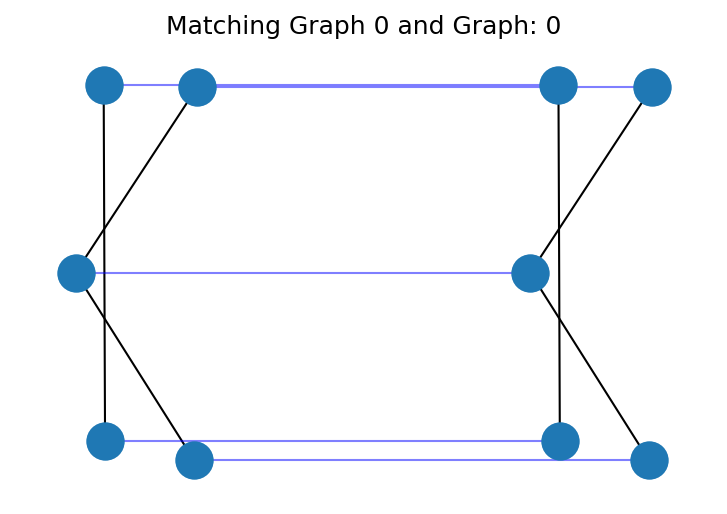

In [20]:
def draw(j):
    ax.cla()
    ax.axis('off')    
    ax.set_title('Matching Graph 0 and Graph: %d' % j)
   
    G2 = read_letters(os.path.join(homedir,'data','Letter', distortion, letter+'P1_'+ str(j).zfill(4) +'.gxl'))
    G2nodesFeatures,G2adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G2)
    UnaryCosts,QuadraticCosts =ComputeUnaryQuadraticCostsV1(G1,G2,G1nodesFeatures,G2nodesFeatures)
    NodeMatching=BuildGraphMatchingModule(G1,G2,UnaryCosts,QuadraticCosts)
    
    bestmatch = np.array(NodeMatching.argmax(axis=1))
    G1G2=nx.disjoint_union(G1,G2)
    n1=len(G1.nodes())
    for i in range(n1,G1G2.number_of_nodes()):
        G1G2.nodes[i]['position']=[G1G2.nodes[i]['position'][0]+5,G1G2.nodes[i]['position'][1]]
    edgelista=[]
    for i in range(n1):
        k=bestmatch[i]
        edgelista.append((i, k+n1))

        
    nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')),ax=ax)
    nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')),edgelist=edgelista,width=1, alpha=0.5, edge_color='b',ax=ax)
    plt.show()

# Select distortion [LOW, MED, HIGH]
distortion = 'LOW'
# Select letter [A, E, F, H, I, K, L, M, N, T, V, W, X, Y, Z]
letter = 'K'
# Select id [0-149]
id=0
# Read the graph and draw it using networkx tools
G1 = read_letters(os.path.join(homedir,'data','Letter', distortion, letter+'P1_'+ str(id).zfill(4) +'.gxl'))
G1nodesFeatures,G1adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G1)
fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(0)  # draw the prediction of the first epoch
plt.close()

In [21]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.FuncAnimation(fig, draw, frames=149, interval=1000)
ani.save('GraphMachingLetterKLOWCOSTV1.mp4')
HTML(ani.to_html5_video())

# Let us do some animation with costs without features. Subgraph isomorphism problem is solved. (costs version 2)


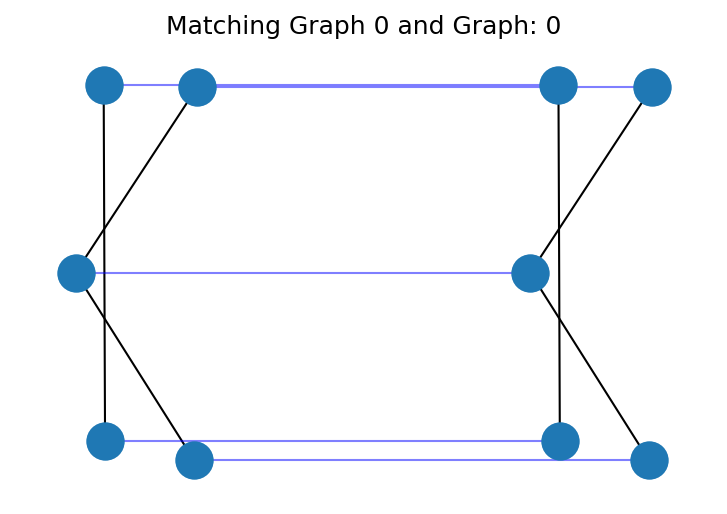

In [22]:
def draw(j):
    ax.cla()
    ax.axis('off')    
    ax.set_title('Matching Graph 0 and Graph: %d' % j)
   
    G2 = read_letters(os.path.join(homedir,'data','Letter', distortion, letter+'P1_'+ str(j).zfill(4) +'.gxl'))
    G2nodesFeatures,G2adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G2)
    UnaryCosts,QuadraticCosts =ComputeUnaryQuadraticCostsV2(G1,G2,G1nodesFeatures,G2nodesFeatures)
    NodeMatching=BuildGraphMatchingModule(G1,G2,UnaryCosts,QuadraticCosts)
    
    bestmatch = np.array(NodeMatching.argmax(axis=1))
    G1G2=nx.disjoint_union(G1,G2)
    n1=len(G1.nodes())
    for i in range(n1,G1G2.number_of_nodes()):
        G1G2.nodes[i]['position']=[G1G2.nodes[i]['position'][0]+5,G1G2.nodes[i]['position'][1]]
    edgelista=[]
    for i in range(n1):
        k=bestmatch[i]
        edgelista.append((i, k+n1))

        
    nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')),ax=ax)
    nx.draw(G1G2, pos=dict(G1G2.nodes(data='position')),edgelist=edgelista,width=1, alpha=0.5, edge_color='b',ax=ax)
    plt.show()

# Select distortion [LOW, MED, HIGH]
distortion = 'LOW'
# Select letter [A, E, F, H, I, K, L, M, N, T, V, W, X, Y, Z]
letter = 'K'
# Select id [0-149]
id=0
# Read the graph and draw it using networkx tools
G1 = read_letters(os.path.join(homedir,'data','Letter', distortion, letter+'P1_'+ str(id).zfill(4) +'.gxl'))
G1nodesFeatures,G1adjacency=ExtractNodeFeaturesAndAdjacencyMatrix(G1)
fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(0)  # draw the prediction of the first epoch
plt.close()

In [23]:
from matplotlib import animation, rc
from IPython.display import HTML

ani = animation.FuncAnimation(fig, draw, frames=149, interval=1000)
ani.save('GraphMachingLetterKLOWCOSTV2.mp4')
HTML(ani.to_html5_video())

## Let us matching two graphs without attributes

### Let us create 2 simple graphs


# G1 creation

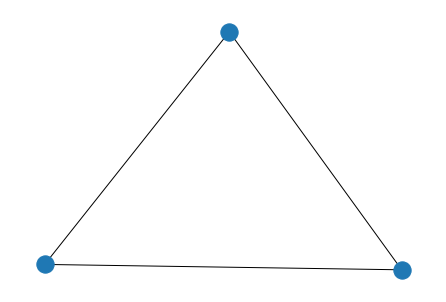

In [24]:
G1adjacency = np.array([[0, 1,1], [1, 0,0],[0,1,0]])
G1nodesFeatures= np.ones((G1adjacency.shape[0],1))
G1 = nx.from_numpy_matrix(G1adjacency)
nx.draw(G1)


# G2 creation

{1: {'weight': 1}, 3: {'weight': 1}}


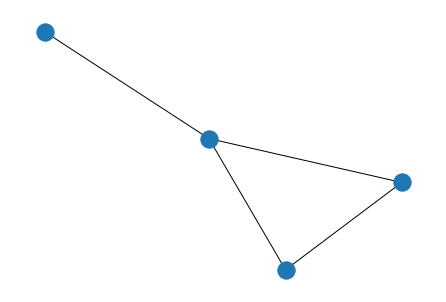

In [25]:
G2adjacency = np.array([[0, 1,0,0], [0, 0,0,1],[0,0,0,1],[1,0,0,0]])
G2nodesFeatures= np.ones((G2adjacency.shape[0],1))
G2 = nx.from_numpy_matrix(G2adjacency)
nx.draw(G2)
print(G2[0])


In [26]:
 UnaryCosts,QuadraticCosts =ComputeUnaryQuadraticCostsV2(G1,G2,G1nodesFeatures,G2nodesFeatures)
 

In [27]:
NodeMatching=BuildGraphMatchingModule(G1,G2,UnaryCosts,QuadraticCosts)

In [28]:
bestmatch = np.array(NodeMatching.argmax(axis=1))

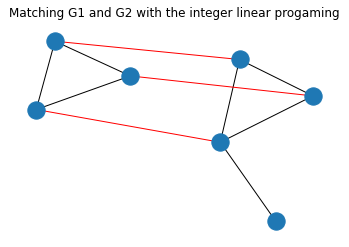

In [29]:
ax = plt.axes()
ax.cla()
ax.axis('off')    
ax.set_title('Matching G1 and G2 with the integer linear progaming')

G1G2=nx.disjoint_union(G1,G2)
n1=len(G1.nodes())

colors=[]
edgelista=[]
edges = G1G2.edges()
colors = ["black" for u,v in edges]
edgelista = [(u,v) for u,v in edges]

for i in range(n1):
    k=bestmatch[i]
    edgelista.append((i, k+n1))
    colors.append("red")

G1G2.add_edges_from(edgelista)

nx.draw(G1G2,edgelist=edgelista,edge_color=colors,ax=ax)

plt.show()



# Let us try to match these two graphs with an heuristic method.
This Heuristic is based on Eigen Vector and Sinkhorn-Knopp algorithm.


The notebook can be found in :
"[a graph matching method based on the leading Eigen vector and Sinkhorn-Knopp algorithm](
http://romain.raveaux.free.fr/document/A+graph+matching+method+based+on+the+leading+Eigen+vector+and+Sinkhorn-Knopp+algorithm.html)"

(12, 12)
[[1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1.]]


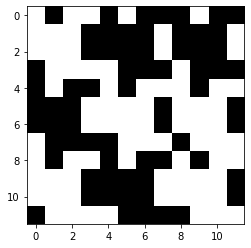

In [30]:
def BuildKv1(G1nodesFeatures,G2nodesFeatures,G1adjacency,G2adjacency):
    n1=G1nodesFeatures.shape[0]
    n2=G2nodesFeatures.shape[0]
    cst=1
    K = np.zeros((n1*n2,n1*n2))
    print(K.shape)
    ik=-1
    for i in range(n1):
        for k in range(n2):
            ik+=1
            jl=-1
            for j in range(n1):
                for l in range(n2):
                    jl+=1
                    if i==j and k==l :
                        feature1 = G1nodesFeatures[i]
                        feature2 = G2nodesFeatures[k]
                        sim=feature1.dot(feature2.T)
                        K[ik,jl]=1
                    else:
                        e1=G1adjacency[i,j]
                        e2=G2adjacency[k,l]
                        if e1==e2:
                            K[ik,jl]=cst
                        else:
                            K[ik,jl]=0

    print(K)   
    return K

    
K=BuildKv1(G1nodesFeatures,G2nodesFeatures,G1adjacency,G2adjacency)
plt.imshow(K,cmap="gray")

In [31]:
def GraphMatchingPowerIteration(K,n1,n2,N):
    m=np.ones((n1*n2))
    for i in range(N):
        num=K.dot(m)
        denum=np.linalg.norm(num,2)
        res=num/denum
        m=res
    y=m
    Y=y.reshape((n1,n2))
    return y,Y

N=100
n1=G1nodesFeatures.shape[0]
n2=G2nodesFeatures.shape[0]
y,Y=GraphMatchingPowerIteration(K,n1,n2,N)
print('Printing the node-to-node mapping matrix')
print(Y)
print("Printing the best matching for each node of G1")
print(Y.argmax(axis=1))
print("Computing the objective function")
res=y.T.dot(K)
obj=res.dot(y)
print("Printing the objective value. It should be equal to the highest eigenvalue")
print(obj)
print("Printing the norm of the mapping vector y. It should be equal to one")
print(np.linalg.norm(y,2))


Printing the node-to-node mapping matrix
[[0.20250624 0.20250624 0.20250624 0.20250624]
 [0.34556068 0.34556068 0.34556068 0.34556068]
 [0.29929758 0.29929758 0.29929758 0.29929758]]
Printing the best matching for each node of G1
[0 0 0]
Computing the objective function
Printing the objective value. It should be equal to the highest eigenvalue
6.184387171407661
Printing the norm of the mapping vector y. It should be equal to one
1.0


# Refine the matching by the Sinkhorn-Knopp algorithm

In [32]:
def SinkhornKnopp(Y,N):
    M=Y.copy()
    for i in range(N):
        res=M.sum(axis=1) #sum row onen1.T.dot(M)
        Mk=np.divide(M,res[:,None])
        res=Mk.sum(axis=0)  #sum col
        Mk2=np.divide(Mk,res[:,None].T)
        M=Mk2

    return M

N=10
M=SinkhornKnopp(Y,N)
print("Chekching if the columns sum to one")
print(M.sum(axis=0))
print("Chekching if the rows sum to one")
print(M.sum(axis=1))

print("Printing the best matching for each node of G1")
bestmatch = Y.argmax(axis=1)
print(bestmatch)

Chekching if the columns sum to one
[1. 1. 1. 1.]
Chekching if the rows sum to one
[1.33333333 1.33333333 1.33333333]
Printing the best matching for each node of G1
[0 0 0]


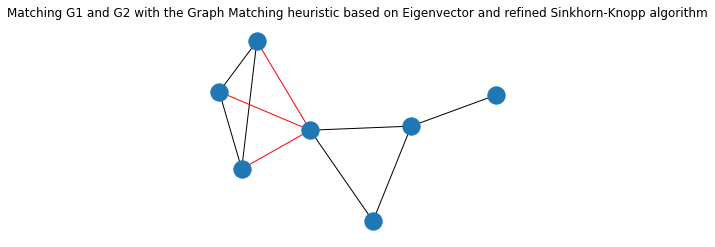

In [33]:
ax = plt.axes()
ax.cla()
ax.axis('off')    
ax.set_title('Matching G1 and G2 with the Graph Matching heuristic based on Eigenvector and refined Sinkhorn-Knopp algorithm')

G1G2=nx.disjoint_union(G1,G2)
n1=len(G1.nodes())

colors=[]
edgelista=[]
edges = G1G2.edges()
colors = ["black" for u,v in edges]
edgelista = [(u,v) for u,v in edges]

for i in range(n1):
    k=bestmatch[i]
    edgelista.append((i, k+n1))
    colors.append("red")

G1G2.add_edges_from(edgelista)

nx.draw(G1G2,edgelist=edgelista,edge_color=colors,ax=ax)

plt.show()
